### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_trks = pd.read_csv('https://api.vitaldb.net/trks')
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_labs = pd.read_csv('https://api.vitaldb.net/labs')

* df_trks chech

In [3]:
df_trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


* If df_trks['tname'] == 'SNUADC/PLETH'

In [4]:
df_trks['tname'].unique() 

array(['BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/EMG', 'BIS/SEF',
       'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Primus/AWP', 'Primus/CO2',
       'Primus/COMPLIANCE', 'Primus/ETCO2', 'Primus/EXP_DES',
       'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
       'Primus/FIO2', 'Primus/INCO2', 'Primus/INSP_DES',
       'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV',
       'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR', 'Primus/PIP_MBAR',
       'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_AGE',
       'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW',
       'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_TM',
       'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV',
       'Primus/SET_TV_L', 'Primus/TV', 'Primus/VENT_LEAK', 'SNUADC/ART',
       'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH',
       'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP',
       'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2',
       'Solar8000/FIO2', '

In [5]:
df_trks_id = set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid'])

In [6]:
len(df_trks_id)

6157

In [7]:
len(set(df_trks_id))

6157

In [8]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [9]:
len(df_cases.columns)

74

* Only SNUADC/PLETH id

In [10]:
df_ica = df_cases[df_cases['caseid'].map(lambda x: x in df_trks_id)]

In [11]:
df_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


* ica : label(up, norm, down)

In [12]:
lab_ica_id = list(set(df_labs[df_labs['name'] == 'ica']['caseid']))

In [13]:
df_labs_ica = df_ica[df_ica['caseid'].map(lambda x: x in lab_ica_id)]

In [14]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [15]:
def anocut(x):
  if 1.05 <= x <= 1.35:
    output = 'Norm'
  elif x > 1.35:
    output = 'UpNorm'
  else:
    output = 'DnNorm'
  return output

In [16]:
df_labs['label'] = df_labs[df_labs['name'] == 'ica']['result'].map(lambda x : anocut(x))

In [17]:
df_labs = df_labs.dropna()

In [18]:
df_labs

,caseid,dt,name,result,label
55,1,3060,ica,1.03,DnNorm
56,1,8921,ica,1.04,DnNorm
57,1,4628,ica,1.08,Norm
346,4,28903,ica,1.13,Norm
347,4,19934,ica,1.15,Norm
...,...,...,...,...,...
928275,6386,3549,ica,1.18,Norm
928276,6386,12554,ica,1.18,Norm
928359,6387,1905,ica,1.10,Norm
928422,6388,6649,ica,1.03,DnNorm


* drop_duplicates

In [19]:
df_ica_label = df_labs.drop_duplicates(['caseid'],  keep='last', inplace=False, ignore_index=False)

In [20]:
id_lb = df_ica_label[['caseid', 'label']]

In [21]:
id_lb

,caseid,label
57,1,Norm
351,4,Norm
708,5,Norm
1075,7,Norm
1435,10,Norm
...,...,...
927826,6383,Norm
928156,6385,Norm
928276,6386,Norm
928359,6387,Norm


In [22]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


* merge : case, labs

In [23]:
final_df = pd.merge(df_labs_ica, id_lb, on='caseid')

In [24]:
final_df 

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,label
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,Norm
1,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,80,0.0,100,100,0,50,0,0,0,Norm
2,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0.0,0,160,0,10,900,0,2100,Norm
3,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0.0,0,120,0,0,0,0,0,Norm
4,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,90,0.0,0,110,0,20,500,0,600,Norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,0,0.0,0,80,0,10,0,0,300,Norm
3532,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,100,0.0,0,100,0,25,30,0,300,Norm
3533,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,70,0.0,0,130,0,10,0,0,0,Norm
3534,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,120,0.0,0,50,0,0,0,0,0,Norm


* drop NAN

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3535
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseid               3536 non-null   int64  
 1   subjectid            3536 non-null   int64  
 2   casestart            3536 non-null   int64  
 3   caseend              3536 non-null   int64  
 4   anestart             3536 non-null   int64  
 5   aneend               3536 non-null   float64
 6   opstart              3536 non-null   int64  
 7   opend                3536 non-null   int64  
 8   adm                  3536 non-null   int64  
 9   dis                  3536 non-null   int64  
 10  icu_days             3536 non-null   int64  
 11  death_inhosp         3536 non-null   int64  
 12  age                  3536 non-null   float64
 13  sex                  3536 non-null   object 
 14  height               3536 non-null   float64
 15  weight               3536 non-null   f

In [26]:
final_df = final_df.dropna(axis=1)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3535
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   caseid           3536 non-null   int64  
 1   subjectid        3536 non-null   int64  
 2   casestart        3536 non-null   int64  
 3   caseend          3536 non-null   int64  
 4   anestart         3536 non-null   int64  
 5   aneend           3536 non-null   float64
 6   opstart          3536 non-null   int64  
 7   opend            3536 non-null   int64  
 8   adm              3536 non-null   int64  
 9   dis              3536 non-null   int64  
 10  icu_days         3536 non-null   int64  
 11  death_inhosp     3536 non-null   int64  
 12  age              3536 non-null   float64
 13  sex              3536 non-null   object 
 14  height           3536 non-null   float64
 15  weight           3536 non-null   float64
 16  bmi              3536 non-null   float64
 17  emop          

In [28]:
final_df['label'].value_counts()

Norm      3334
UpNorm     114
DnNorm      88
Name: label, dtype: int64

* data balance

In [29]:
#df_dn = final_df[final_df['label'] == 'DnNorm'][:88]

In [30]:
#df_norm = final_df[final_df['label'] == 'Norm'][:88]

In [31]:
#df_up = final_df[final_df['label'] == 'UpNorm'][:88]

In [32]:
df_bal = final_df

In [33]:
#df_bal = pd.concat([df_dn, df_norm, df_up], axis=0)

In [34]:
df_bal

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,label
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,Norm
1,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,80,0.0,100,100,0,50,0,0,0,Norm
2,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0.0,0,160,0,10,900,0,2100,Norm
3,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0.0,0,120,0,0,0,0,0,Norm
4,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,90,0.0,0,110,0,20,500,0,600,Norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,0,0.0,0,80,0,10,0,0,300,Norm
3532,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,100,0.0,0,100,0,25,30,0,300,Norm
3533,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,70,0.0,0,130,0,10,0,0,0,Norm
3534,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,120,0.0,0,50,0,0,0,0,0,Norm


* train_x

In [35]:
f_train_x = df_bal.drop(['caseid','label'], axis=1)

* object : one-hot encoding

In [36]:
df_tp = f_train_x.dtypes.reset_index()

In [37]:
df_tp

,index,0
0,subjectid,int64
1,casestart,int64
2,caseend,int64
3,anestart,int64
4,aneend,float64
5,opstart,int64
6,opend,int64
7,adm,int64
8,dis,int64
9,icu_days,int64


### Feature Selection

In [38]:
ob_lt = list(df_tp[(df_tp[0] == 'object')]['index'])

In [39]:
ob_lt

['sex',
 'department',
 'optype',
 'dx',
 'opname',
 'approach',
 'ane_type',
 'preop_ecg',
 'preop_pft']

In [40]:
uniq = dict()
for i in ob_lt:
    uniq[i] = len(f_train_x[i].unique())

In [41]:
uniq

{'sex': 2,
 'department': 4,
 'optype': 11,
 'dx': 706,
 'opname': 205,
 'approach': 3,
 'ane_type': 3,
 'preop_ecg': 25,
 'preop_pft': 9}

In [42]:
f_train_x = f_train_x.drop(['dx', 'preop_ecg','opname'], axis=1)

In [43]:
ob_lt = ['sex',
    'department',
    'optype',
#    'dx',
#    'opname',
    'approach',
    'ane_type',
#    'preop_ecg',
    'preop_pft']

In [44]:
df_oh = pd.get_dummies(f_train_x[ob_lt])

In [45]:
df_no_oh = f_train_x.drop(ob_lt, axis=1)

In [46]:
final_train_x = pd.concat([df_oh, df_no_oh], axis=1)

In [47]:
final_train_x

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,0,1,1,0,0,0,0,0,1,0,...,0,120,0.0,100,70,0,10,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,80,0.0,100,100,0,50,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0.0,0,160,0,10,900,0,2100
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0.0,0,120,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,0,1,1,0,0,0,0,0,0,0,...,35,0,0.0,0,80,0,10,0,0,300
3532,0,1,1,0,0,0,0,0,1,0,...,0,100,0.0,0,100,0,25,30,0,300
3533,1,0,1,0,0,0,0,0,0,0,...,0,70,0.0,0,130,0,10,0,0,0
3534,1,0,1,0,0,0,1,0,0,0,...,0,120,0.0,0,50,0,0,0,0,0


* remove : correlation

In [48]:
train_corr = final_train_x.corr() ;train_corr

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
sex_F,1.000000,-1.000000,-0.068200,0.242395,-0.015958,-0.100134,0.012798,0.088797,-0.035387,-0.113558,...,-0.016202,-0.019143,-0.003704,0.072545,-0.216232,-0.022239,-0.038946,-0.023963,-0.014341,-0.047424
sex_M,-1.000000,1.000000,0.068200,-0.242395,0.015958,0.100134,-0.012798,-0.088797,0.035387,0.113558,...,0.016202,0.019143,0.003704,-0.072545,0.216232,0.022239,0.038946,0.023963,0.014341,0.047424
department_General surgery,-0.068200,0.068200,1.000000,-0.312860,-0.857557,-0.179142,0.226604,0.064964,0.260063,0.196217,...,0.063960,0.257185,-0.027320,0.113259,-0.148122,-0.052535,0.197948,0.048515,0.014172,0.125011
department_Gynecology,0.242395,-0.242395,-0.312860,1.000000,-0.141861,-0.029635,-0.070895,-0.020325,-0.081363,-0.061389,...,0.057873,0.264801,-0.006230,0.163915,-0.156138,-0.011057,-0.009748,-0.027481,-0.004484,-0.033048
department_Thoracic surgery,-0.015958,0.015958,-0.857557,-0.141861,1.000000,-0.081229,-0.194326,-0.055711,-0.223019,-0.168268,...,-0.105332,-0.453879,0.034474,-0.190832,0.267972,0.062788,-0.204080,-0.034235,-0.012117,-0.113960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
intraop_vecu,-0.022239,0.022239,-0.052535,-0.011057,0.062788,-0.006331,-0.015146,-0.004342,-0.017383,-0.003454,...,-0.012171,-0.029738,0.203149,-0.013903,-0.020888,1.000000,-0.016635,-0.009524,-0.000962,-0.009276
intraop_eph,-0.038946,0.038946,0.197948,-0.009748,-0.204080,-0.003251,0.093216,0.016359,0.028355,0.067093,...,0.143298,0.186426,0.000434,-0.002332,0.094060,-0.016635,1.000000,0.126939,-0.005521,0.137076
intraop_phe,-0.023963,0.023963,0.048515,-0.027481,-0.034235,-0.013747,0.042639,-0.013073,0.007006,-0.002495,...,0.283968,-0.022508,0.007375,-0.010140,0.107885,-0.009524,0.126939,1.000000,0.008228,0.370258
intraop_epi,-0.014341,0.014341,0.014172,-0.004484,-0.012117,-0.002579,-0.005949,-0.001769,-0.006990,-0.005343,...,-0.000127,-0.014687,0.116970,-0.006758,0.005788,-0.000962,-0.005521,0.008228,1.000000,0.202215


In [49]:
train_false = abs(train_corr) > 0.5 ; train_false

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
sex_F,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex_M,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
department_General surgery,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
department_Gynecology,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
department_Thoracic surgery,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
intraop_vecu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
intraop_eph,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
intraop_phe,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
intraop_epi,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [50]:
co_index = []
for i in train_false.index:
    du = train_false[train_false[i] == True].index
    # if corr > 0.5
    du = list(du)
    du = list(du[1:])
    co_index.append(du)

In [51]:
re_co_index = []
for i in co_index:
    for j in i:
        re_co_index.append(j)

* high corr count

In [52]:
from collections import Counter

In [53]:
cnt = Counter(re_co_index)

In [54]:
cnt = dict(cnt) ; cnt

{'sex_M': 3,
 'height': 3,
 'department_Thoracic surgery': 3,
 'optype_Major resection': 2,
 'optype_Minor resection': 3,
 'approach_Robotic': 2,
 'approach_Videoscopic': 2,
 'ane_type_Sedationalgesia': 2,
 'preop_pft_Normal': 2,
 'opend': 3,
 'intraop_rocu': 3,
 'dis': 2,
 'weight': 2,
 'bmi': 2,
 'intraop_ca': 2}

In [55]:
len(cnt)

15

In [56]:
index = [ k for k, v in cnt.items() if v >= 1]

In [57]:
len(index)

15

In [58]:
final_train_x = final_train_x.drop(index, axis=1) ; final_train_x.head()

,sex_F,department_General surgery,department_Gynecology,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,optype_Others,optype_Stomach,...,intraop_rbc,intraop_ffp,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_vecu,intraop_eph,intraop_phe,intraop_epi
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,120,0.0,100,0,10,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,80,0.0,100,0,50,0,0
2,0,1,0,0,0,0,0,0,0,0,...,8,8,0,0,0.0,0,0,10,900,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,90,0.0,0,0,20,500,0


### Feature Extraction

* PCA

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=47)
pca_array = pca.fit_transform(final_train_x)
pca_df = pd.DataFrame(pca_array, index=final_train_x.index,
                      columns=[f"pca{num+1}" for num in range(final_train_x.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47
0,-942615.161786,-1.175244e+06,-1747.700574,-2904.505227,-526.110620,450.743824,-69.062319,-51.537030,13.416697,94.308378,...,-0.029086,0.009986,-0.039517,-0.007759,-0.002192,-0.002838,-0.010010,-0.003439,-0.005720,5.909348e-09
1,-948886.033974,-1.211029e+06,7738.967641,1146.195711,-448.485934,240.271994,-44.733685,-120.560648,56.576592,59.899384,...,0.044694,-0.007700,-0.019457,0.005480,-0.000932,-0.009074,-0.003765,-0.000784,-0.004522,-4.551773e-09
2,-939375.462836,-1.344268e+06,8288.032651,-1363.350418,-537.548470,22.900388,-16.170677,727.355959,378.854991,-31.474291,...,-0.084832,-0.137662,-0.147095,0.052030,-0.025808,-0.049961,0.039907,-0.007831,-0.002943,1.913222e-09
3,-939412.057599,-1.257178e+06,2573.533878,-2080.445330,1019.508054,855.434536,-62.006725,-67.647576,20.091075,-36.043358,...,-0.019281,-0.021755,-0.005280,-0.006407,-0.002110,0.044526,-0.007166,-0.004367,-0.000216,6.956255e-10
4,-951432.352686,-1.191557e+06,7743.172631,882.136726,-945.826223,-582.073423,26.329547,357.162769,235.907940,45.151249,...,0.030651,-0.021060,0.001398,0.003313,-0.008642,-0.005053,0.000145,-0.000594,-0.003064,-3.365558e-09


In [60]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(final_train_x.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,3.853906e+15,5.008679e-01,0.500868
pca2,3.840550e+15,4.991321e-01,1.000000
pca3,3.796719e+07,4.934357e-09,1.000000
pca4,3.101800e+06,4.031214e-10,1.000000
pca5,7.974315e+05,1.036372e-10,1.000000
pca6,4.817258e+05,6.260687e-11,1.000000
pca7,3.963903e+05,5.151636e-11,1.000000
pca8,3.689114e+04,4.794510e-12,1.000000
pca9,1.741055e+04,2.262740e-12,1.000000
pca10,3.064200e+03,3.982348e-13,1.000000


In [61]:
re_pca =[]
for i in pca_array:
    pca_num = i[:3]
    re_pca.append(pca_num)

In [62]:
train_y = df_bal['label']

In [63]:
train_x = re_pca

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_x

[array([ -942615.16178561, -1175244.48901529,    -1747.70057415]),
 array([ -948886.03397375, -1211029.39406373,     7738.96764107]),
 array([ -939375.46283565, -1344268.00351619,     8288.0326508 ]),
 array([ -939412.05759874, -1257178.0278804 ,     2573.53387824]),
 array([ -951432.35268578, -1191557.4167242 ,     7743.17263128]),
 array([ -931842.09706632, -1296326.27140918,    -2420.70561423]),
 array([-9.36753913e+05, -1.27441167e+06, -3.57166289e+02]),
 array([ -964649.17355364, -1032684.61578664,     7194.10953132]),
 array([ -957216.05740207, -1201460.73001527,    14278.83502259]),
 array([-1010048.1441009 ,  -592347.36691295,    13274.5303426 ]),
 array([-9.35113528e+05, -1.29661325e+06,  1.10384150e+03]),
 array([ -928588.52910971, -1280501.40738677,    -6723.85930406]),
 array([ -945228.55756128, -1190471.12268102,     1553.25648331]),
 array([ -941479.82239124, -1181710.01166104,    -2473.12925353]),
 array([ -949691.19352591, -1281268.46443563,    13662.13208747]),
 array(

In [66]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,
                                                   test_size=0.2, random_state=42, stratify=train_y)

* Modeling

* Decision Tree

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

In [68]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [69]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
dt_preds = dt_clf.predict(X_test)

In [71]:
accuracy_score(y_test, dt_preds)

0.8686440677966102

In [72]:
f1_score(y_test, dt_preds, average='weighted')

0.8776554318367558

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cf = confusion_matrix(y_test, dt_preds)
print(cf)

[[  0  17   1]
 [ 25 614  28]
 [  0  22   1]]


In [75]:
from sklearn.metrics import classification_report

In [76]:
target_names = ['Up', 'Norm', 'Down']

In [77]:
print(classification_report(y_test, dt_preds, target_names=target_names))

              precision    recall  f1-score   support

          Up       0.00      0.00      0.00        18
        Norm       0.94      0.92      0.93       667
        Down       0.03      0.04      0.04        23

    accuracy                           0.87       708
   macro avg       0.32      0.32      0.32       708
weighted avg       0.89      0.87      0.88       708



* tuning

In [78]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [5, 10, 15],
    'max_leaf_nodes': [2, 3, 4],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=cv)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
nan


In [79]:
len(X_test)

708

In [80]:
len(y_test)

708

In [81]:
dt_preds = grid_cv.predict(X_test)

In [82]:
dt_score = grid_cv.predict_proba(X_test)

In [83]:
np.save('/workspace/ML_result/dt_preds', dt_preds)

In [84]:
np.save('/workspace/ML_result/dt_score', dt_score)

In [85]:
np.save('/workspace/ML_result/y_test', y_test)

In [86]:
accuracy_score(y_test, dt_preds)

0.942090395480226

In [87]:
print(classification_report(y_test, dt_preds, target_names=target_names))

              precision    recall  f1-score   support

          Up       0.00      0.00      0.00        18
        Norm       0.94      1.00      0.97       667
        Down       0.00      0.00      0.00        23

    accuracy                           0.94       708
   macro avg       0.31      0.33      0.32       708
weighted avg       0.89      0.94      0.91       708



* lightGBM

In [88]:
import lightgbm as lgb

In [89]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_train, y_train)

LGBMClassifier(objective='binary')

In [90]:
y_pred = lgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9265536723163842

In [92]:
y_score = lgb_clf.predict_proba(X_test)

In [91]:
np.save('/workspace/ML_result/lgbm_preds', y_pred)

In [93]:
np.save('/workspace/ML_result/lgbm_score', y_score)

In [94]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          Up       0.00      0.00      0.00        18
        Norm       0.94      0.98      0.96       667
        Down       0.00      0.00      0.00        23

    accuracy                           0.93       708
   macro avg       0.31      0.33      0.32       708
weighted avg       0.89      0.93      0.91       708



In [95]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

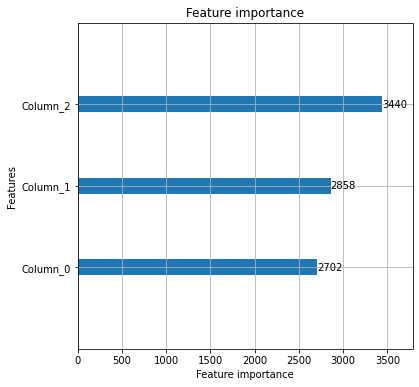

In [96]:
f, ax = plt.subplots(figsize=(6,6))
plot_importance(lgb_clf, max_num_features=15, ax=ax)

* KNN

In [97]:
neigh_clf = KNeighborsClassifier()

In [98]:
neigh_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
neigh_preds = neigh_clf.predict(X_test)

In [100]:
accuracy_score(y_test, neigh_preds)

0.942090395480226

In [101]:
f1_score(y_test, neigh_preds, average='weighted')

0.9139989727786337

In [102]:
params = {
    'n_neighbors': [8, 10, 13, 15, 18, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 2, 3, 5, 10, 20],
    'p': [1, 2]
}

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(neigh_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
nan


In [103]:
neigh_preds = grid_cv.predict(X_test)

In [104]:
np.save('/workspace/ML_result/neigh_preds', neigh_preds)

In [105]:
neigh_score = grid_cv.predict_proba(X_test)

In [106]:
np.save('/workspace/ML_result/neigh_score', neigh_score)

In [107]:
accuracy_score(y_test, neigh_preds)

0.942090395480226

In [108]:
f1_score(y_test, neigh_preds, average='weighted')

0.9139989727786337

In [109]:
print(classification_report(y_test, neigh_preds, target_names=target_names))

              precision    recall  f1-score   support

          Up       0.00      0.00      0.00        18
        Norm       0.94      1.00      0.97       667
        Down       0.00      0.00      0.00        23

    accuracy                           0.94       708
   macro avg       0.31      0.33      0.32       708
weighted avg       0.89      0.94      0.91       708

